In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pred_csvs = !ls /home/pataki/crc_data_paper/modeling/zoom2/fold*/*pred*
pred_csvs

['/home/pataki/crc_data_paper/modeling/zoom2/fold1/preds.csv',
 '/home/pataki/crc_data_paper/modeling/zoom2/fold2/preds.csv',
 '/home/pataki/crc_data_paper/modeling/zoom2/fold3/preds.csv',
 '/home/pataki/crc_data_paper/modeling/zoom2/fold4/preds.csv',
 '/home/pataki/crc_data_paper/modeling/zoom2/fold5/preds.csv']

In [3]:
preds = pd.DataFrame()
for i in pred_csvs:
    preds = preds.append(pd.read_csv(i))
    
preds.pop('Unnamed: 0');    
preds.head()

,burnt_out_pct,fname,low_saturation_pct,topleft_x,topleft_y,highgrade_dysplasia,adenocarcinoma,suspicious_for_invasion,lymphovascular_invasion,inflammation,...,pred_lowgrade_dysplasia,pred_highgrade_dysplasia,pred_adenocarcinoma,pred_suspicious_for_invasion,pred_inflammation,pred_resection_edge,pred_tumor_necrosis,pred_lymphovascular_invasion,pred_artifact,pred_normal
0,0.038750,/mnt/local/scratch_sata_stripe/scratch/pataki/...,0.055111,86070,291868,0,1,0,0,0,...,0.000786,0.003546,0.990255,0.027393,0.016680,0.001890,0.009786,0.000045,0.000112,0.010758
1,0.390236,/mnt/local/scratch_sata_stripe/scratch/pataki/...,0.413483,86070,293916,0,1,0,0,0,...,0.023967,0.015334,0.922966,0.016383,0.002461,0.000038,0.020312,0.000003,0.000056,0.000892
2,0.127560,/mnt/local/scratch_sata_stripe/scratch/pataki/...,0.148148,88118,291868,0,1,0,0,0,...,0.005011,0.005490,0.981115,0.009107,0.198430,0.000413,0.003630,0.000015,0.000067,0.016112
3,0.143879,/mnt/local/scratch_sata_stripe/scratch/pataki/...,0.166771,88118,293916,0,1,0,0,0,...,0.001247,0.036156,0.991158,0.059325,0.013609,0.000011,0.010254,0.000004,0.000025,0.000773
4,0.011669,/mnt/local/scratch_sata_stripe/scratch/pataki/...,0.018280,88118,295964,0,1,0,0,0,...,0.013164,0.127713,0.997122,0.003805,0.145737,0.000080,0.001064,0.000082,0.000091,0.000656


In [4]:
preds.columns.values

array(['burnt_out_pct', 'fname', 'low_saturation_pct', 'topleft_x',
       'topleft_y', 'highgrade_dysplasia', 'adenocarcinoma',
       'suspicious_for_invasion', 'lymphovascular_invasion',
       'inflammation', 'resection_edge', 'tumor_necrosis', 'artifact',
       'normal', 'n_masks_for_slide', 'lowgrade_dysplasia', 'slideID',
       'pred_lowgrade_dysplasia', 'pred_highgrade_dysplasia',
       'pred_adenocarcinoma', 'pred_suspicious_for_invasion',
       'pred_inflammation', 'pred_resection_edge', 'pred_tumor_necrosis',
       'pred_lymphovascular_invasion', 'pred_artifact', 'pred_normal'],
      dtype=object)

In [5]:
preds.shape

(101389, 27)

In [6]:
labels = ['lowgrade_dysplasia',
          'highgrade_dysplasia', 'adenocarcinoma', 'suspicious_for_invasion',
          'inflammation', 'resection_edge', 'tumor_necrosis',
          'artifact', 'normal']

In [7]:
auc_dict       = {}
recall_dict    = {}
precision_dict = {}

for l in labels:
    true_values = preds[l].values
    predictions = preds['pred_' + l].values
    
    auc_dict[l]       = np.round(roc_auc_score(y_true = true_values, y_score = predictions), 4)
    recall_dict[l]    = np.round(recall_score(y_true = true_values, y_pred = predictions > 0.5), 4)
    precision_dict[l] = np.round(precision_score(y_true = true_values, y_pred = predictions > 0.5), 4)

In [8]:
precision_dict

{'lowgrade_dysplasia': 0.8552,
 'highgrade_dysplasia': 0.2513,
 'adenocarcinoma': 0.6405,
 'suspicious_for_invasion': 0.0868,
 'inflammation': 0.2188,
 'resection_edge': 0.106,
 'tumor_necrosis': 0.454,
 'artifact': 0.3236,
 'normal': 0.7883}

In [9]:
recall_dict

{'lowgrade_dysplasia': 0.8788,
 'highgrade_dysplasia': 0.1465,
 'adenocarcinoma': 0.4248,
 'suspicious_for_invasion': 0.0308,
 'inflammation': 0.0702,
 'resection_edge': 0.0425,
 'tumor_necrosis': 0.3478,
 'artifact': 0.0533,
 'normal': 0.8067}

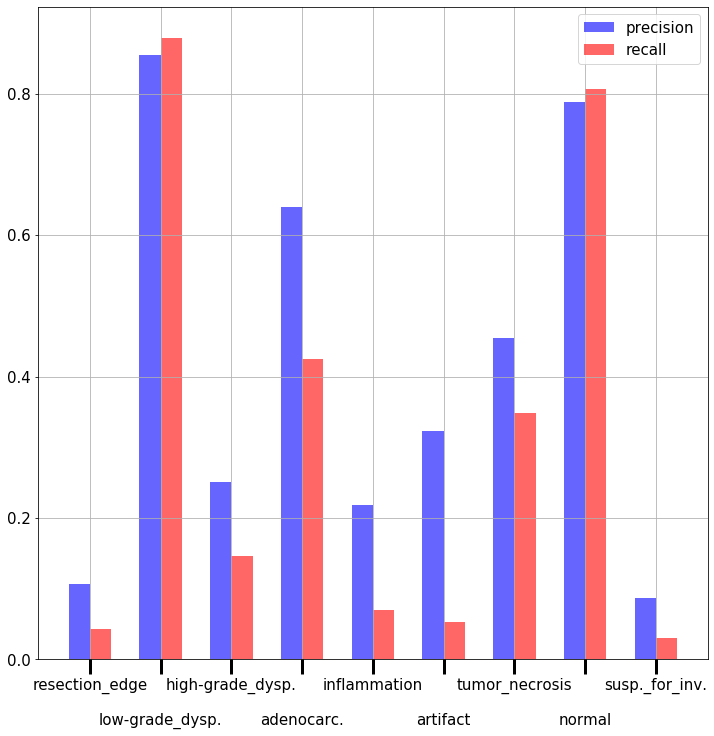

In [10]:
tmp_label_order = ['resection_edge', 'lowgrade_dysplasia',
                   'highgrade_dysplasia', 'adenocarcinoma', 
                   'inflammation',  
                   'artifact', 'tumor_necrosis', 'normal', 'suspicious_for_invasion']

plt.figure(figsize=(12, 12))
d = 0.15
for idx, i in enumerate(tmp_label_order):
    if idx == 0:
        plt.bar([idx-d], [precision_dict[i]], width=d*2, color='blue', alpha=0.6, label='precision')
        plt.bar([idx+d], [recall_dict[i]], width=d*2, color='red', alpha=0.6, label='recall')
    else:
        plt.bar([idx-d], [precision_dict[i]], width=d*2, color='blue', alpha=0.6)
        plt.bar([idx+d], [recall_dict[i]], width=d*2, color='red', alpha=0.6)

tmp_label_order[1] = '\n\n' + tmp_label_order[1]
tmp_label_order[3] = '\n\n' + tmp_label_order[3]
tmp_label_order[5] = '\n\n' + tmp_label_order[5]
tmp_label_order[7] = '\n\n' + tmp_label_order[7]
for idx, i in enumerate(tmp_label_order):
    tmp_label_order[idx] = (tmp_label_order[idx].replace('suspicious', 'susp.')
                            .replace('invasion', 'inv.')
                            .replace('highgrade_dysplasia', 'high-grade_dysp.')
                            .replace('lowgrade_dysplasia', 'low-grade_dysp.')
                            .replace('adenocarcinoma', 'adenocarc.'))

plt.xticks(list(range(len(labels))), tmp_label_order, rotation=0, fontsize=15) 
plt.tick_params('x', length=15, width=3, which='major')

plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

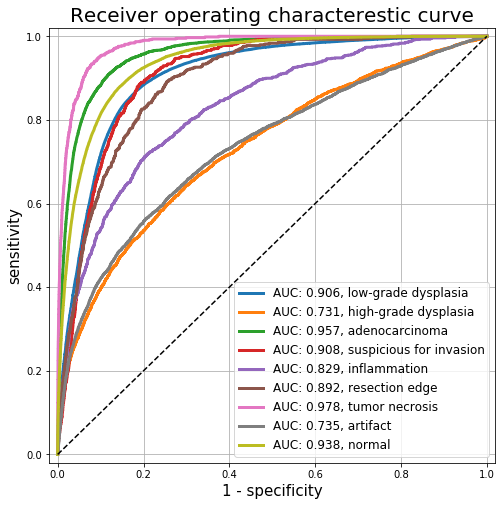

In [11]:
plt.figure(figsize=(8,8))

for l in labels:
        auc = np.round(roc_auc_score(y_true = preds[l].values, y_score = preds['pred_' + l].values), 3)
        fpr, tpr, th = roc_curve(y_true = preds[l].values, y_score = preds['pred_' + l].values)        
        plt.plot(fpr, tpr, label=f"AUC: {str(auc).ljust(5, '0')}, {l.replace('_', ' ').replace('grade', '-grade')}", lw=3)

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot([0, 1], [0, 1], '--', c='k')
plt.legend(fontsize=12)
plt.xlabel('1 - specificity', fontsize=15)
plt.ylabel('sensitivity', fontsize=15)
plt.title('Receiver operating characterestic curve', fontsize=20)
plt.grid()
plt.show()